In [2]:
#load libraries
library(tidyverse)
library(stringr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
#define helper functions
find_library_prep <- function(entry) {
  sapply(entry, function(x) {
    if (grepl("(N)", as.character(x), fixed = TRUE)) {
      "Nextera"
    } else if (grepl("(LA)", as.character(x), fixed = TRUE)) {
      "Linker amplification"
    } else {
      "Standard"
    }
  })
}

convert_sci_to_label <- function(sci_num) {
  format(sci_num, scientific = FALSE)
}

In [4]:
#load data
article_data <- read_csv("article_data.csv") %>%
  mutate(prep = find_library_prep(`Library amplification (# cycles)`)) %>%
  within({
  `Library amplification (# cycles)` <- as.numeric(stringr::str_replace(`Library amplification (# cycles)`, "\\(.*\\)", ""))
  `DNA source` <- stringr::str_replace(`DNA source`, "Tara Oceans ", "")
  })

Parsed with column specification:
cols(
  Experiment = col_character(),
  `DNA source` = col_character(),
  Technology = col_character(),
  `Starting DNA (ng)` = col_number(),
  `Library amplification (# cycles)` = col_character(),
  Replicates = col_integer(),
  `Raw reads (millions)` = col_character(),
  `Raw quality +/-SD (PHRED)` = col_character(),
  `Raw length (bp)` = col_character(),
  `Failed QC +/- SD (%)` = col_character()
)


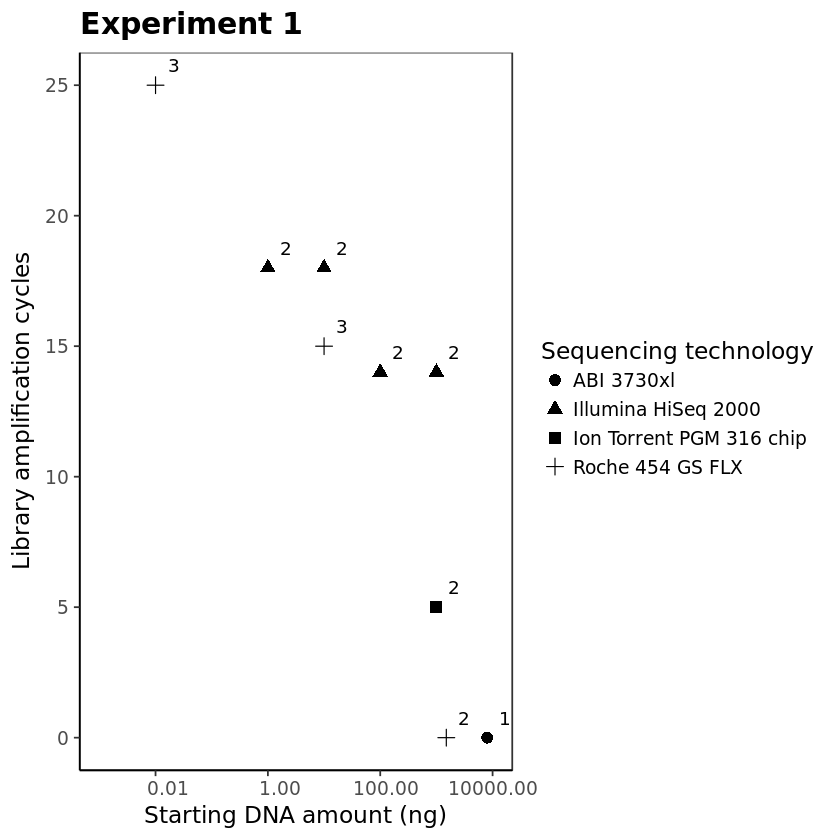

In [5]:
#graph experiment 1
ggplot(data = filter(article_data, Experiment == "Experiment 1"), aes(x = `Starting DNA (ng)`, y = `Library amplification (# cycles)`)) +
  geom_point(aes(shape = Technology), size = 3) +
  scale_x_continuous(limits = c(0.001, 10000), labels = convert_sci_to_label, trans = "log10") +
  geom_text(aes(label = Replicates), hjust = -1, vjust = -1) +
  labs(x = "Starting DNA amount (ng)",
       y = "Library amplification cycles",
       shape = "Sequencing technology") +
  ggtitle("Experiment 1") +
  theme_bw(base_size = 14) +
  theme(plot.title = element_text(size = 18, face = "bold"),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"))

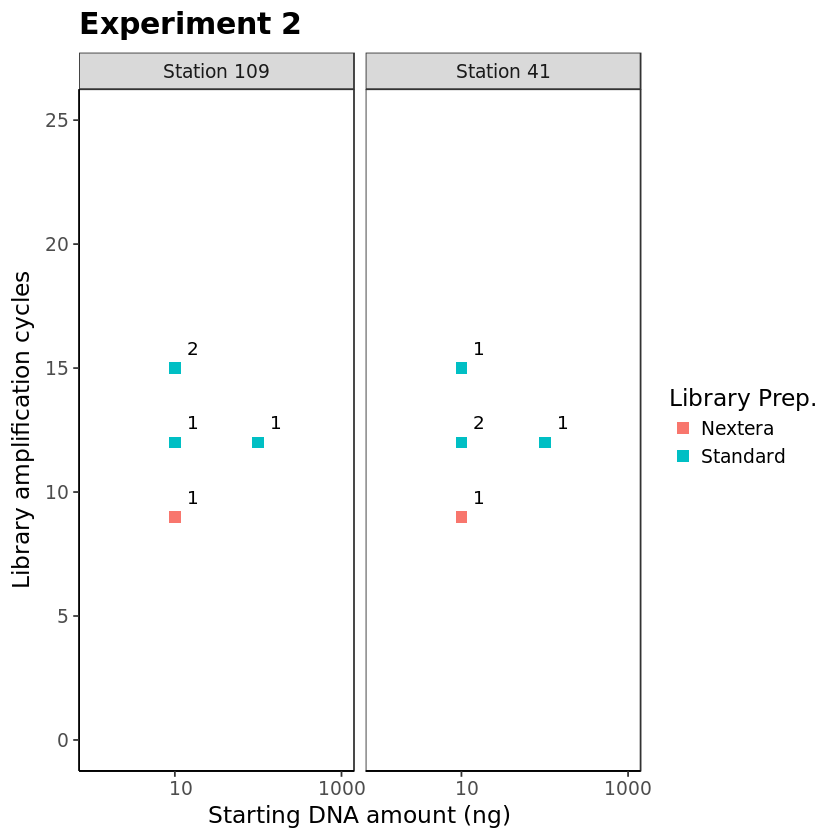

In [10]:
#graph experiment 2
ggplot(data = filter(article_data, Experiment == "Experiment 2"), aes(x = `Starting DNA (ng)`, y = `Library amplification (# cycles)`)) +
  geom_point(aes(color = prep), shape = 15, size = 3) +
  geom_text(aes(label = Replicates), hjust = -1, vjust = -1) +
  scale_y_continuous(limits = c(0, 25)) +
  scale_x_continuous(limits = c(1, 1000), labels = convert_sci_to_label, trans = "log10") +
  facet_wrap(~`DNA source`) +
  labs(x = "Starting DNA amount (ng)",
       y = "Library amplification cycles",
       color = "Library Prep.") +
  ggtitle("Experiment 2") +
  theme_bw(base_size = 14) +
  theme(plot.title = element_text(size = 18, face = "bold"),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"))